In [ ]:
import os
os.chdir('/content/drive/MyDrive/MS_ML')

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_banknote_authentication.csv',names =['col1','col2','col3','col4','target']  ,header=None)
# Class (0 for authentic, 1 for inauthentic)
print(df)

         col1      col2     col3     col4  target
0     3.62160   8.66610  -2.8073 -0.44699       0
1     4.54590   8.16740  -2.4586 -1.46210       0
2     3.86600  -2.63830   1.9242  0.10645       0
3     3.45660   9.52280  -4.0112 -3.59440       0
4     0.32924  -4.45520   4.5718 -0.98880       0
...       ...       ...      ...      ...     ...
1367  0.40614   1.34920  -1.4501 -0.55949       1
1368 -1.38870  -4.87730   6.4774  0.34179       1
1369 -3.75030 -13.45860  17.5932 -2.77710       1
1370 -3.56370  -8.38270  12.3930 -1.28230       1
1371 -2.54190  -0.65804   2.6842  1.19520       1

[1372 rows x 5 columns]


In [ ]:
# Cheking null values
print(df.isnull().sum())

col1      0
col2      0
col3      0
col4      0
target    0
dtype: int64


In [ ]:
np.random.seed(random_seed)

In [ ]:
np.random.choice(100, 5, replace=False)

array([ 3, 85, 63,  8, 26])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class k_means:

  def __init__(self, classes = 3,
               random_seed = 42,
               distance_type = 'euclidean distance'):
    np.random.seed(random_seed)
    self.classes = classes
    self.distance_type = distance_type.lower()
    self.centroids = None
    self.selected_classes = None

  def dist_cal(self,p1,p2):
    if 'euclidean' in self.distance_type:
      return np.sqrt(np.sum((p1-p2)**2))
    
    if 'manhattan' in self.distance_type:
      return sum(abs(p1-p2))
    
  def distance_calculation_batch(self,centroids, X):
    distances = np.zeros((1,len(centroids)))
    for x_ in X:
      dist = np.array([])
      for center in centroids:
        d = self.dist_cal(center,x_)
        dist = np.append(dist,d)
      distances = np.vstack([distances,dist])
    
    return distances[1:,:]
  
  def fit(self,x, 
          iteration = 1000,
          show_graph = True):
    x = np.array(x)

    idx = np.random.choice(len(x), self.classes, replace=False)
    self.centroids = x[idx]

    distances = self.distance_calculation_batch(self.centroids, x)
    self.selected_classes = np.array([np.argmin(i) for i in distances])
     
    for _ in range(iteration): 
        centroids = []
        for idx in range(self.classes):

            temp_cent = x[self.selected_classes==idx].mean(axis=0) 
            centroids.append(temp_cent)
        
        diff =  self.centroids- centroids
        if not diff.any():
          break
        self.centroids = np.vstack(centroids)

        distances = self.distance_calculation_batch(self.centroids, x)
        self.selected_classes = np.array([np.argmin(i) for i in distances])
    
    if show_graph:

      u_labels = np.unique(self.selected_classes)
      for i in u_labels:
          clustered_data = x[np.where(self.selected_classes == i)]
          plt.scatter(clustered_data[0] , clustered_data[1] , label = i)
      plt.title('First two features clusters')
      plt.legend()
      plt.show()

  def predict(self,x):
    x = np.array(x)
    pred = np.array([])
    for x_ in x:
      distances_calculated = np.array([])
      for x_w in self.centroids:
        distances_calculated = np.append(distances_calculated,self.dist_cal(x_w,x_))
      
      pred = np.append(pred, np.argmin(distances_calculated)) 
    
    return pred


In [ ]:
X = df.iloc[:,:-1] #selection features and droping last column
y = df.iloc[:,-1] # selection last columns as label/target

In [ ]:
from sklearn.model_selection import train_test_split
# Split into training and test set
# random_state =42 is used for reproducing your problem the same every time it is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:

"""
becuse we are initiallizing random samples as centroids, there is always different random numbers, 
we have to find best one suits our dataset
"""


'\nbecuse we are initiallizing random samples as centroids, there is always different random numbers, \nwe have to find best one suits our dataset\n'

In [ ]:
for random_seed in range(0,100,5):
  k_means_predictor = k_means(distance_type = 'euclidean distance',
                              random_seed = random_seed,
                              classes = 2)
  k_means_predictor.fit(X_train, show_graph = False)
  # training evaluate metrics
  y_pred = k_means_predictor.predict(X_test)
  #Checking the accuracy
  print('On random value:',random_seed,'got',accuracy_score(y_test, y_pred))

On random value: 0 got 0.5672727272727273
On random value: 5 got 0.43272727272727274
On random value: 10 got 0.5672727272727273
On random value: 15 got 0.43272727272727274
On random value: 20 got 0.5672727272727273
On random value: 25 got 0.5672727272727273
On random value: 30 got 0.43272727272727274
On random value: 35 got 0.43272727272727274
On random value: 40 got 0.43272727272727274
On random value: 45 got 0.5672727272727273
On random value: 50 got 0.5672727272727273
On random value: 55 got 0.5672727272727273
On random value: 60 got 0.43272727272727274
On random value: 65 got 0.43272727272727274
On random value: 70 got 0.43272727272727274
On random value: 75 got 0.5672727272727273
On random value: 80 got 0.43272727272727274
On random value: 85 got 0.5672727272727273
On random value: 90 got 0.5672727272727273
On random value: 95 got 0.5672727272727273


In [ ]:
X_train.shape

(1097, 4)

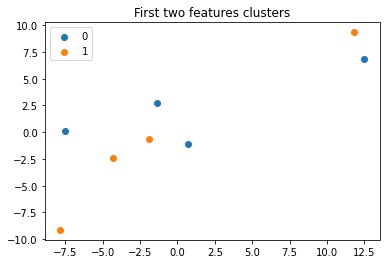

In [ ]:
k_means_predictor = k_means(distance_type = 'euclidean distance', random_seed = 0,classes = 2)
k_means_predictor.fit(X_train)

In [ ]:
# Function to print out comparision of model prediction and true labels

def validation(y_true,y_pred):
  auc=accuracy_score(y_true,y_pred)
  print('Testing accuracy of the model:',np.round(auc,2)) #accuracy of results
  print('Confuction matrix')
  cm = confusion_matrix(y_true,y_pred)
  print(cm) #confusion matrix of result

  unique, counts = np.unique(y_true, return_counts=True)
  ax = sns.heatmap(cm/counts, annot=True, 
              fmt='.2%', cmap='Blues')

  ax.set_title(' Confusion Matrix')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ')
  print(classification_report(y_true,y_pred, target_names=['authentic','inauthentic'])) #classification report
  return auc

Testing accuracy of the model: 0.62
Confuction matrix
[[461 153]
 [261 222]]
              precision    recall  f1-score   support

   authentic       0.64      0.75      0.69       614
 inauthentic       0.59      0.46      0.52       483

    accuracy                           0.62      1097
   macro avg       0.62      0.61      0.60      1097
weighted avg       0.62      0.62      0.61      1097



0.6226071103008204

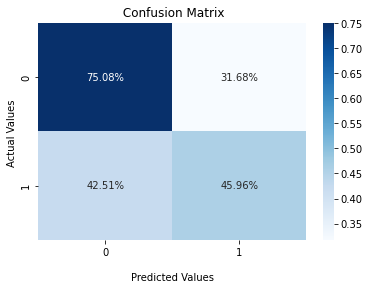

In [ ]:
# training evaluate metrics
y_pred = k_means_predictor.predict(X_train)
#Checking the accuracy
validation(y_train, y_pred)

Testing accuracy of the model: 0.57
Confuction matrix
[[110  38]
 [ 81  46]]
              precision    recall  f1-score   support

   authentic       0.58      0.74      0.65       148
 inauthentic       0.55      0.36      0.44       127

    accuracy                           0.57       275
   macro avg       0.56      0.55      0.54       275
weighted avg       0.56      0.57      0.55       275



0.5672727272727273

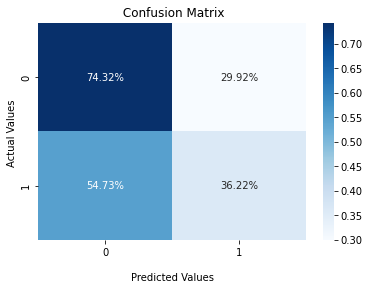

In [ ]:
# test evaluate metrics
y_pred = k_means_predictor.predict(X_test)
#Checking the accuracy
validation(y_test, y_pred)

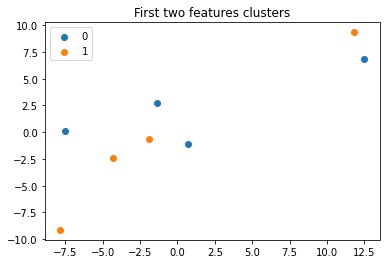

In [ ]:
# Changing distance function to check if thier any differences in resuls.
k_means_predictor = k_means(distance_type = 'manhattan distance', random_seed = 0,classes = 2)
k_means_predictor.fit(X_train)

Testing accuracy of the model: 0.62
Confuction matrix
[[456 158]
 [254 229]]
              precision    recall  f1-score   support

   authentic       0.64      0.74      0.69       614
 inauthentic       0.59      0.47      0.53       483

    accuracy                           0.62      1097
   macro avg       0.62      0.61      0.61      1097
weighted avg       0.62      0.62      0.62      1097



0.6244302643573382

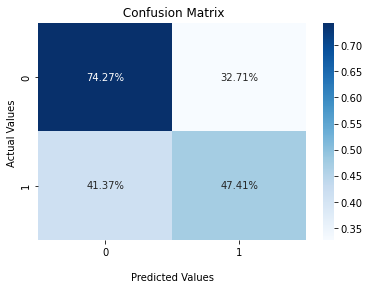

In [ ]:
# training evaluate metrics
y_pred = k_means_predictor.predict(X_train)
#Checking the accuracy
validation(y_train, y_pred)

Testing accuracy of the model: 0.57
Confuction matrix
[[110  38]
 [ 79  48]]
              precision    recall  f1-score   support

   authentic       0.58      0.74      0.65       148
 inauthentic       0.56      0.38      0.45       127

    accuracy                           0.57       275
   macro avg       0.57      0.56      0.55       275
weighted avg       0.57      0.57      0.56       275



0.5745454545454546

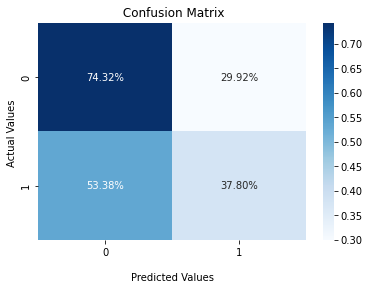

In [ ]:
# test evaluate metrics
y_pred = k_means_predictor.predict(X_test)
#Checking the accuracy
validation(y_test, y_pred)